In [79]:
import imp 
import tree_functions as tree
imp.reload(tree)
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import time

In [120]:
n = 1000 
n_small = 100
z_range = 8
r_gen = 0.5
r_s_gen = 0.9
mean_gen = 0
sd_gen = 1 

fig_size = (12, 8)
fig_size1 = (8, 5.333)

figures_file = 'figures/' 
figures_param = '_n' + str(n) + '_' + 'r' + str(int(r_gen * 100)) + '_' + 'r_s' + \
                str(int(r_s_gen * 100)) + '_.png'

In [ ]:
# plt.style.use('default')

In [121]:
# Initialize parent distribution
parent_distribution = tree.normal_distribution(n, z_range, mean_gen, sd_gen)
parent_distribution_small = tree.normal_distribution(n_small, z_range, mean_gen, sd_gen)


In [106]:
imp.reload(tree)

<module 'tree_functions' from '/Users/jessemurray/Desktop/Tree/tree_functions.py'>

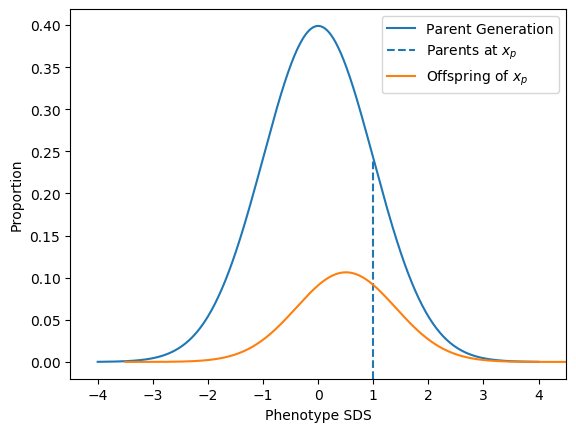

In [119]:
parent_index = tree.z_score_to_index(z_score=1, number_of_steps=n, \
                                     z_score_range=z_range)
single_offspring_distribution2 = tree.one_offspring_distribution(parent_distribution, \
                                                                 parent_index, 0.5, r_s_gen)
# plt.figure(figsize=fig_size1)
# plt.title('True (some) regression to the mean. Inheritance. r = 0.5.')
tree.plot_distribution(parent_distribution, label='Parent Generation')
plt.axvline(x=1, linestyle='--', \
            ymax=tree.f_norm(1,0,1)/0.41, label='Parents at $x_p$')
tree.plot_distribution(single_offspring_distribution2, label='Offspring of $x_p$')
# plt.axvline(x=0.5, linestyle='--', label='x = 0.5', color='orange')
plt.xlim(-4.5, 4.5)
plt.legend()
plt.savefig(figures_file + 'individual_offspring' + figures_param, dpi=300)
plt.show()

In [127]:
offspring_distributions_ = tree.offspring_distributions(parent_distribution_small, r_gen, r_s_gen)

In [153]:
imp.reload(tree)

<module 'tree_functions' from '/Users/jessemurray/Desktop/Tree/tree_functions.py'>

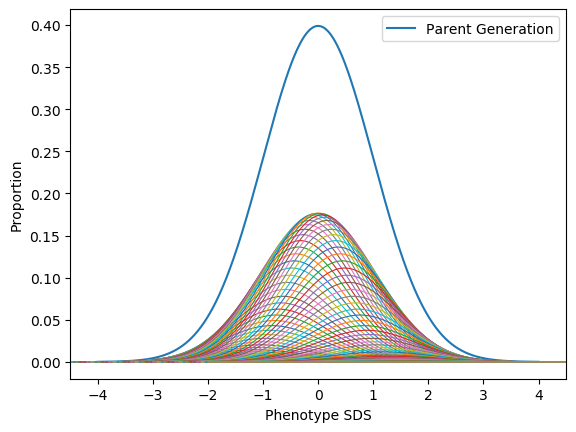

In [155]:
# plt.figure(figsize=fig_size1)
plt.xlim(-4.5, 4.5)
tree.plot_distribution(parent_distribution, label='Parent Generation')
tree.plot_distributions(offspring_distributions_) 
plt.legend()
plt.savefig(figures_file + 'offspring_distributions' + figures_param, dpi=300)
plt.show()

In [122]:

# Initialize total offspring distribution
total_offspring_distribution = \
tree.final_superimposed_distribution_all_area_adj(parent_distribution, r_gen, r_s_gen)  

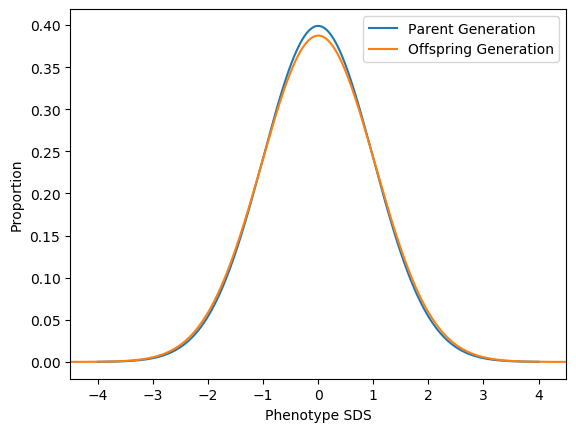

In [125]:
# plt.figure(figsize=fig_size1)
plt.xlim(-4.5, 4.5)
tree.plot_distribution(parent_distribution, label='Parent Generation') 
tree.plot_distribution(total_offspring_distribution, label='Offspring Generation') 
plt.legend()
plt.savefig(figures_file + 'offspring_generation' + figures_param, dpi=300)
plt.show()

In [156]:
step_percentile = tree.step_proportion_attributable_percentile(parent_distribution, r_gen, \
                                        r_s_gen, 0.2, total_offspring_distribution)

In [172]:
imp.reload(tree)

<module 'tree_functions' from '/Users/jessemurray/Desktop/Tree/tree_functions.py'>

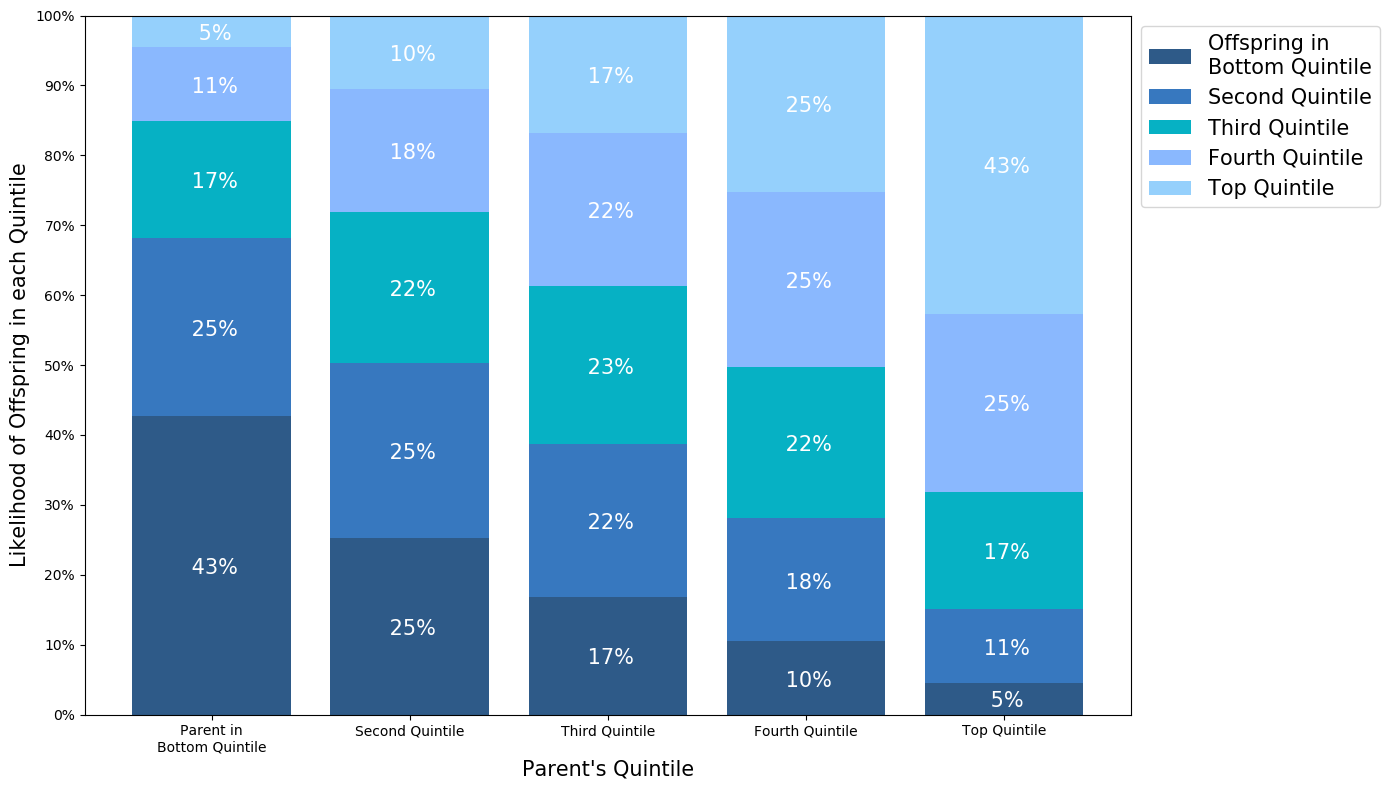

In [173]:
plt.figure(figsize=(14,8))
tree.bar_graph_step(step_percentile)
plt.tight_layout()
plt.savefig(figures_file + 'model_mobility' + figures_param, dpi=300)
plt.show()

In [68]:
y = np.arange(-1,1,0.02) + np.random.randn(100)

In [69]:
x = np.arange(-1,1,0.02) + np.random.randn(100)

In [75]:
x2 = (0.7 * x) + 3

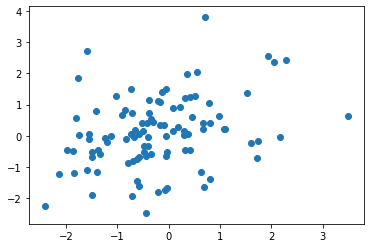

In [71]:
plt.scatter(x,y)

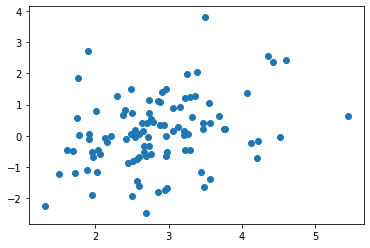

In [76]:
plt.scatter(x2,y)

In [77]:
np.corrcoef(x,y)

array([[1.        , 0.32375702],
       [0.32375702, 1.        ]])

In [78]:
np.corrcoef(x2,y)

array([[1.        , 0.32375702],
       [0.32375702, 1.        ]])